## Initialization code

In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.append('/opt/datadriver/workspace/')

In [8]:
import sys,os,os.path
import pickle
import pandas as pd
from smartgrid.microgrid.simulator import microgrid_simulator
from smartgrid.io.export_grafana import export_to_whisper

In [9]:
os.environ['PROJECT_HOME'] = '/opt/datadriver/workspace/'

In [17]:
EXPORT_PATH = '../data/datadriver_data/whisper/simu_sizing/'

## Optimization

In [33]:
def find_optimal_parameters(coeff_charges=[1], coeff_PV=[0, 0.125, 0.25, 0.325, 0.5, 0.75, 1, 1.25],
                            coeff_batterie=[0, 0.25, 0.5, 0.75, 1, 1.5, 2, 4],
                            output_path='../data/simulator_sizing/',
                            max_history=None):
    consolidated = {"id": [], "load": [], "pv": [], "battery": []}
    for c_charge in coeff_charges:
        for c_pv in coeff_PV:
            for c_bat in coeff_batterie:
                outputs = microgrid_simulator(c_charge, c_pv, c_bat, num_points=1000, max_history=max_history)
                Autoconsommation = outputs['Autoconsommation']
                Autoproduction = outputs['Autoproduction']
                print("Parameters Charge", c_charge, "PV", c_pv, "Battery", c_bat)
                print("=> Autoconsommation ", Autoconsommation)
                print("=> Autoproduction ", Autoproduction)
                file_key = "simulator_sizing/%d/%d/%d/%.2lf-%.2lf" %(c_charge * 1000, c_pv * 1000, c_bat * 1000, 
                                                                                  Autoconsommation,
                                                                                  Autoproduction)
                file_key = file_key.replace(".", "_")
                file_name = output_path + file_key.replace("/", "-")
                with open(file_name, "wb") as fp:
                    pickle.dump(outputs, fp)
                consolidated["id"].append(file_name)
                consolidated["load"].append(c_charge)
                consolidated["pv"].append(c_pv)
                consolidated["battery"].append(c_bat)
                for key in outputs:
                    try:
                        val = float(outputs[key])
                        if key not in consolidated:
                            consolidated[key] = []
                        consolidated[key].append(val)
                    except:
                        pass
                df_ts = pd.DataFrame(data={'TU': outputs['TU'], 'P_pv_dc': outputs['P_pv_dc'],
                                             'P_pv_dc_mpp': outputs['P_pv_dc_mpp'],
                                            'P_limitation_PV': outputs['P_limitation_PV'],
                                            'productionPV_AC': outputs['productionPV_AC'],
                                            'P_ac_dispo': outputs['P_ac_dispo']})
                export_to_whisper(df_ts, EXPORT_PATH,
                                  file_key,
                                  ['1m:3y', '10m:5y', '1d:10y'],
                                  timestamp_column='TU', overwrite=True)
    return pd.DataFrame(consolidated)

In [ ]:
conso = find_optimal_parameters(max_history=100000)

('Parameters Charge', 1, 'PV', 0, 'Battery', 0)
('=> Autoconsommation ', 0)
('=> Autoproduction ', 1.0)


('Parameters Charge', 1, 'PV', 0, 'Battery', 0.25)
('=> Autoconsommation ', 0)
('=> Autoproduction ', 1.0)


('Parameters Charge', 1, 'PV', 0, 'Battery', 0.5)
('=> Autoconsommation ', 0)
('=> Autoproduction ', 1.0)


('Parameters Charge', 1, 'PV', 0, 'Battery', 0.75)
('=> Autoconsommation ', 0)
('=> Autoproduction ', 1.0)


('Parameters Charge', 1, 'PV', 0, 'Battery', 1)
('=> Autoconsommation ', 0)
('=> Autoproduction ', 1.0)


('Parameters Charge', 1, 'PV', 0, 'Battery', 1.5)
('=> Autoconsommation ', 0)
('=> Autoproduction ', 1.0)


('Parameters Charge', 1, 'PV', 0, 'Battery', 2)
('=> Autoconsommation ', 0)
('=> Autoproduction ', 1.0)


('Parameters Charge', 1, 'PV', 0, 'Battery', 4)
('=> Autoconsommation ', 0)
('=> Autoproduction ', 1.0)


('Parameters Charge', 1, 'PV', 0.125, 'Battery', 0)
('=> Autoconsommation ', 1.0974004682303524)
('=> Autoproduction ', 1.0)
('Parameters Charge', 1, 'PV', 0.125, 'Battery', 0.25)
('=> Autoconsommation ', 1.0974004682303524)
('=> Autoproduction ', 1.0)
('Parameters Charge', 1, 'PV', 0.125, 'Battery', 0.5)
('=> Autoconsommation ', 1.0974004682303524)
('=> Autoproduction ', 1.0)
('Parameters Charge', 1, 'PV', 0.125, 'Battery', 0.75)
('=> Autoconsommation ', 1.0974004682303524)
('=> Autoproduction ', 1.0)
('Parameters Charge', 1, 'PV', 0.125, 'Battery', 1)
('=> Autoconsommation ', 1.0974004682303524)
('=> Autoproduction ', 1.0)
('Parameters Charge', 1, 'PV', 0.125, 'Battery', 1.5)
('=> Autoconsommation ', 1.0974004682303524)
('=> Autoproduction ', 1.0)
('Parameters Charge', 1, 'PV', 0.125, 'Battery', 2)
('=> Autoconsommation ', 1.0974004682303524)
('=> Autoproduction ', 1.0)
('Parameters Charge', 1, 'PV', 0.125, 'Battery', 4)
('=> Autoconsommation ', 1.0974004682303524)
('=> Autoproductio

In [27]:
df2 = conso.pivot(index='battery', columns='pv', values='Eauxiliaires')

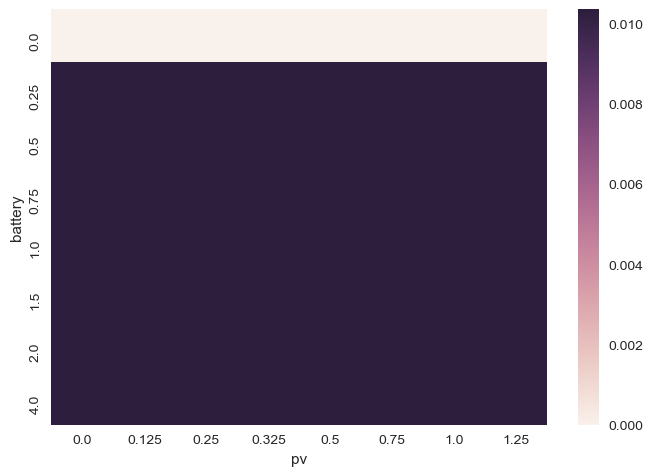

In [29]:
seaborn.heatmap(df2)